<h1> <center> &#127756 Parcial I Física Computacional &#127826 </center> </h1>

<h3> <center> <em> Sebastián Marín, Gabriela E. Díaz, J. Sebastián Useche </em> </center> </h3>
<h4> <center> <em> Programa de Física, Facultad de Ciencias Básicas y Tecnologías </em> </center></h4>
<br><br>
<center> Trabajo realizado en: </center> 
 
![logo jupyter](jup_logo.png)

In [36]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model

In [37]:
# Abriendo archivo csv
datos = pd.read_csv("METABRIC_RNA_Mutation.csv")
datos.columns[:31]

C:\Users\s\AppData\Local\Temp\ipykernel_9388\565455140.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("METABRIC_RNA_Mutation.csv")


Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

In [38]:
datos["mutation_count"].describe()

count    1859.000000
mean        5.697687
std         4.058778
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        80.000000
Name: mutation_count, dtype: float64

<h2> Primer paso: selección y explicación de variables </h2>
<hr>
<p>Inicialmente, se seleccionan las variables que se utilizarán y se analiza cada columna individualmente para determinar si tiene un significado coherente en el modelo que se vaya a realizar. Así, la contribución de cada columna es la siguiente:</p>
<ul>
    <li> <b> cancer_type_detailed:</b> Contiene la información específica del tipo de cáncer detectado.</li>
    <li> <b> lymph_nodes_examined_positive:</b> Describe cuantos ganglios linfáticos han detectado células cancerosas. </li>
    <li> <b> overall_survival:</b> si el paciente esta vivo o muerto. </li>
    <li> <b> tumor_size: </b> tamaño del tumor en mm. </li>
    <li> <b> chemotherapy: </b> Si el paciente fue tratado o no con quimioterapia. </li>
    <li> <b>age_at_diagnosis: </b> Edad de diagnóstico. </li>
</ul>

In [39]:
# Tabla de las variables seleccionadas
analisis = pd.DataFrame(datos, columns = ["cancer_type_detailed","overall_survival", "chemotherapy","overall_survival_months",
                                      "tumor_size", "age_at_diagnosis","nottingham_prognostic_index","lymph_nodes_examined_positive"])
analisis

,cancer_type_detailed,overall_survival,chemotherapy,overall_survival_months,tumor_size,age_at_diagnosis,nottingham_prognostic_index,lymph_nodes_examined_positive
0,Breast Invasive Ductal Carcinoma,1,0,140.500000,22.0,75.65,6.044,10.0
1,Breast Invasive Ductal Carcinoma,1,0,84.633333,10.0,43.19,4.020,0.0
2,Breast Invasive Ductal Carcinoma,0,1,163.700000,15.0,48.87,4.030,1.0
3,Breast Mixed Ductal and Lobular Carcinoma,1,1,164.933333,25.0,47.68,4.050,3.0
4,Breast Mixed Ductal and Lobular Carcinoma,0,1,41.366667,40.0,76.97,6.080,8.0
...,...,...,...,...,...,...,...,...
1899,Breast Invasive Lobular Carcinoma,1,0,196.866667,25.0,43.10,5.050,1.0
1900,Breast Invasive Ductal Carcinoma,0,0,44.733333,20.0,42.88,5.040,1.0
1901,Breast Invasive Ductal Carcinoma,0,0,175.966667,25.0,62.90,6.050,45.0
1902,Breast Invasive Ductal Carcinoma,0,0,86.233333,25.0,61.16,5.050,12.0


In [40]:
analisis.info()
analisis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cancer_type_detailed           1889 non-null   object 
 1   overall_survival               1904 non-null   int64  
 2   chemotherapy                   1904 non-null   int64  
 3   overall_survival_months        1904 non-null   float64
 4   tumor_size                     1884 non-null   float64
 5   age_at_diagnosis               1904 non-null   float64
 6   nottingham_prognostic_index    1904 non-null   float64
 7   lymph_nodes_examined_positive  1904 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 119.1+ KB


cancer_type_detailed             15
overall_survival                  0
chemotherapy                      0
overall_survival_months           0
tumor_size                       20
age_at_diagnosis                  0
nottingham_prognostic_index       0
lymph_nodes_examined_positive     0
dtype: int64

<h2> Segundo paso </h2>
<hr>
<p> Ahora, se deben eliminar aquellos datos que no aporten a la base de datos, es decir, los valores nulos; ya que pueden generar errores en los diferentes parámetros estadísticos que se calculen como la mediana, el promedio, la media, entre otros.</p>
<p> El propósito de la siguiente celda es eliminar aquellas filas cuyos valores <b>NO</b> nulos ocupen al menos un 80% de los datos, ya que consideramos que si faltan al menos dos datos de cada paciente, puede dificultar el diagnóstico del mismo. El resultado fue que se eliminaron 6 filas. Posteriormente, se rectificó que no hubiesen identificaciones duplicadas en la base de datos, ya que es el único dato irrepetible.</p>

In [41]:
# Porcentaje de valores no nulos para la limpieza
porcentaje = 0.8

# Eliminación de valores nulos con cierto umbral
limpieza_1 = analisis.dropna(thresh = porcentaje*len(analisis.columns))
limpieza_1 = limpieza_1.dropna(thresh = porcentaje*len(analisis), axis = 1)
limpieza_1

,cancer_type_detailed,overall_survival,chemotherapy,overall_survival_months,tumor_size,age_at_diagnosis,nottingham_prognostic_index,lymph_nodes_examined_positive
0,Breast Invasive Ductal Carcinoma,1,0,140.500000,22.0,75.65,6.044,10.0
1,Breast Invasive Ductal Carcinoma,1,0,84.633333,10.0,43.19,4.020,0.0
2,Breast Invasive Ductal Carcinoma,0,1,163.700000,15.0,48.87,4.030,1.0
3,Breast Mixed Ductal and Lobular Carcinoma,1,1,164.933333,25.0,47.68,4.050,3.0
4,Breast Mixed Ductal and Lobular Carcinoma,0,1,41.366667,40.0,76.97,6.080,8.0
...,...,...,...,...,...,...,...,...
1899,Breast Invasive Lobular Carcinoma,1,0,196.866667,25.0,43.10,5.050,1.0
1900,Breast Invasive Ductal Carcinoma,0,0,44.733333,20.0,42.88,5.040,1.0
1901,Breast Invasive Ductal Carcinoma,0,0,175.966667,25.0,62.90,6.050,45.0
1902,Breast Invasive Ductal Carcinoma,0,0,86.233333,25.0,61.16,5.050,12.0


In [42]:
def var_str(Dataframe, columna):
    Valores_unicos = Dataframe[columna].unique()
    for i in range(len(Valores_unicos)):
        print(Valores_unicos[i], "=", i)

In [43]:
# Planteamiento de ecuación
# ===============================================================================================
from sklearn import preprocessing

# Creación de vector de variable dependiente
var_dep = "overall_survival"
y = limpieza_1.loc[:, var_dep]

# Variables categóricas
var_str(limpieza_1, "cancer_type_detailed")
analisis1 = limpieza_1.drop(["cancer_type_detailed"], axis = 1)
encoder = preprocessing.LabelEncoder()
analisis1["cancer_type_detailed"] = encoder.fit_transform(limpieza_1.cancer_type_detailed.values)
analisis1.cancer_type_detailed.replace({5: np.nan}, inplace = True)

analisis1.describe()

Breast Invasive Ductal Carcinoma = 0
Breast Mixed Ductal and Lobular Carcinoma = 1
Breast Invasive Lobular Carcinoma = 2
Breast Invasive Mixed Mucinous Carcinoma = 3
Breast = 4
nan = 5
Metaplastic Breast Cancer = 6


,overall_survival,chemotherapy,overall_survival_months,tumor_size,age_at_diagnosis,nottingham_prognostic_index,lymph_nodes_examined_positive,cancer_type_detailed
count,1903.000000,1903.000000,1903.000000,1884.000000,1903.000000,1903.000000,1903.000000,1902.000000
mean,0.420389,0.208092,125.185759,26.238726,61.090736,4.034087,2.003153,1.452156
std,0.493751,0.406050,76.302400,15.160976,12.981128,1.143842,4.080807,1.043793
min,0.000000,0.000000,0.000000,1.000000,21.930000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,60.883333,17.000000,51.370000,3.046000,0.000000,1.000000
50%,0.000000,0.000000,115.633333,23.000000,61.780000,4.042000,0.000000,1.000000
75%,1.000000,0.000000,184.733333,30.000000,70.595000,5.040500,2.000000,1.000000
max,1.000000,1.000000,355.200000,182.000000,96.290000,6.360000,45.000000,6.000000


In [44]:
analisis1.isnull().sum()

overall_survival                  0
chemotherapy                      0
overall_survival_months           0
tumor_size                       19
age_at_diagnosis                  0
nottingham_prognostic_index       0
lymph_nodes_examined_positive     0
cancer_type_detailed              1
dtype: int64

In [45]:
def Deteccion_outliers(Base_datos): 
    # Tomando el boxplot como medidor de outliers
    for i in Base_datos:
    
        #======================================
        # Cuantiles
        print("===================================")
        print("Para", i)
        print("===================================")
        print(Base_datos[i].describe())
        Q1 = Base_datos[i].quantile(0.25)
        Q3= Base_datos[i].quantile(0.75)
    
        IQR = Q3 - Q1
        print("El rango intercuartil es:", IQR)
    
        #======================================
        # Bigotes
    
        BI = Q1 - 1.5 * IQR
        if BI < Base_datos[i].min():
            BI = Base_datos[i].min()
        print("El primer bigote está en x =", BI)
    
        BS = Q3 + 1.5 * IQR
        if BS > Base_datos[i].max():
            BS = Base_datos[i].max()
        print("El segundo bigote está en x =", BS)
    
        #======================================
        # Ubicando outliers
    
        Ubi_outliers = (BS < Base_datos[i]) | (Base_datos[i] < BI)
        Ubi_outliers = Ubi_outliers.apply(lambda x: int(x))
        print("Hay" ,Ubi_outliers.sum() ,"outliers", end = "\n\n")

In [46]:
#analisis1["tumor_size"] = np.log(analisis1["tumor_size"])
#sns.boxplot(x = analisis1["tumor_size"])
#Deteccion_outliers(analisis1)
#Deteccion_outliers(np.sqrt(analisis1))
#Deteccion_outliers(np.log(analisis1))
#Deteccion_outliers(1/analisis1)

# Segun estas pruebas, se eligieron las mejores transformaciones 
# para cada columna
analisis1["tumor_size"] = np.log(analisis1["tumor_size"])
analisis1["age_at_diagnosis"] = np.sqrt(analisis1["age_at_diagnosis"])
analisis1["lymph_nodes_examined_positive"] = np.sqrt(analisis1["lymph_nodes_examined_positive"])

In [47]:
#prediciendo datos nulos con vecinos cercanos, para ellos se normalizan los datos de 0 a 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(analisis1), columns = analisis1.columns)
df.head()


,overall_survival,chemotherapy,overall_survival_months,tumor_size,age_at_diagnosis,nottingham_prognostic_index,lymph_nodes_examined_positive,cancer_type_detailed
0,1.0,0.0,0.395552,0.593974,0.782634,0.941045,0.471405,0.166667
1,1.0,0.0,0.238270,0.442464,0.368233,0.563433,0.000000,0.166667
2,0.0,1.0,0.460867,0.520378,0.449873,0.565299,0.149071,0.166667
3,1.0,1.0,0.464339,0.618538,0.433179,0.569030,0.258199,0.666667
4,0.0,1.0,0.116460,0.708854,0.797362,0.947761,0.421637,0.666667


In [48]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=500)
df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df1.isna().sum()

overall_survival                 0
chemotherapy                     0
overall_survival_months          0
tumor_size                       0
age_at_diagnosis                 0
nottingham_prognostic_index      0
lymph_nodes_examined_positive    0
cancer_type_detailed             0
dtype: int64

Text(0, 0.5, 'cantidad de datos')

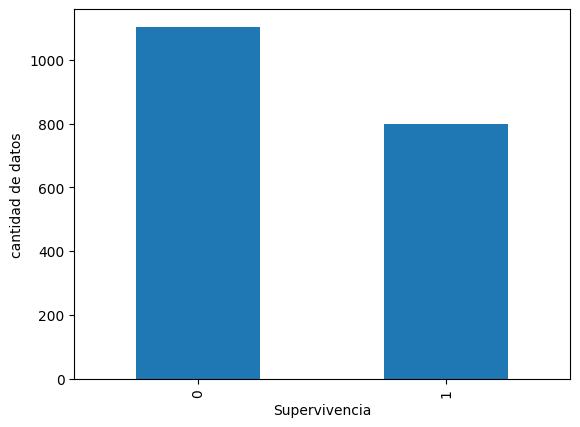

In [49]:
analisis1['overall_survival'].value_counts().to_frame().T
analisis1['overall_survival'].value_counts().plot(kind='bar')
plt.xlabel("Supervivencia")
plt.ylabel("cantidad de datos")

In [50]:
###modelo maquna soporte vectorial
x = df1.drop("overall_survival", axis=1)

y = df1["overall_survival"]
y

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
1898    1.0
1899    0.0
1900    0.0
1901    0.0
1902    0.0
Name: overall_survival, Length: 1903, dtype: float64

In [51]:
#creando datos de entrenamiento y de prueba
#Dividamos nuestros datos utilizando el 80 % para entrenamiento y el 20 % restante para pruebas.
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=20) 

In [52]:
print ('The size of our training "X" (input features) is', x_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', x_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (1522, 7)


The size of our testing "X" (input features) is (381, 7)


The size of our training "y" (output feature) is (1522,)


The size of our testing "y" (output features) is (381,)


<h1> Árboles de decisión </h1>
<hr>

In [53]:
# Modelo
from sklearn.tree import DecisionTreeClassifier

# Graficos
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

# Para optimizar Modelos, Fase validacion
from sklearn.model_selection import GridSearchCV

# evaluar modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
from sklearn.metrics import precision_recall_fscore_support as score

In [54]:
Modelo1 = DecisionTreeClassifier(max_depth=7, criterion = 'gini', random_state = 123) # profundidad hiperparametro a optimizar
Modelo1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=123)

In [63]:
y_predict = Modelo1.predict(x_test)

Profundidad del árbol: 7
Número de nodos terminales: 83


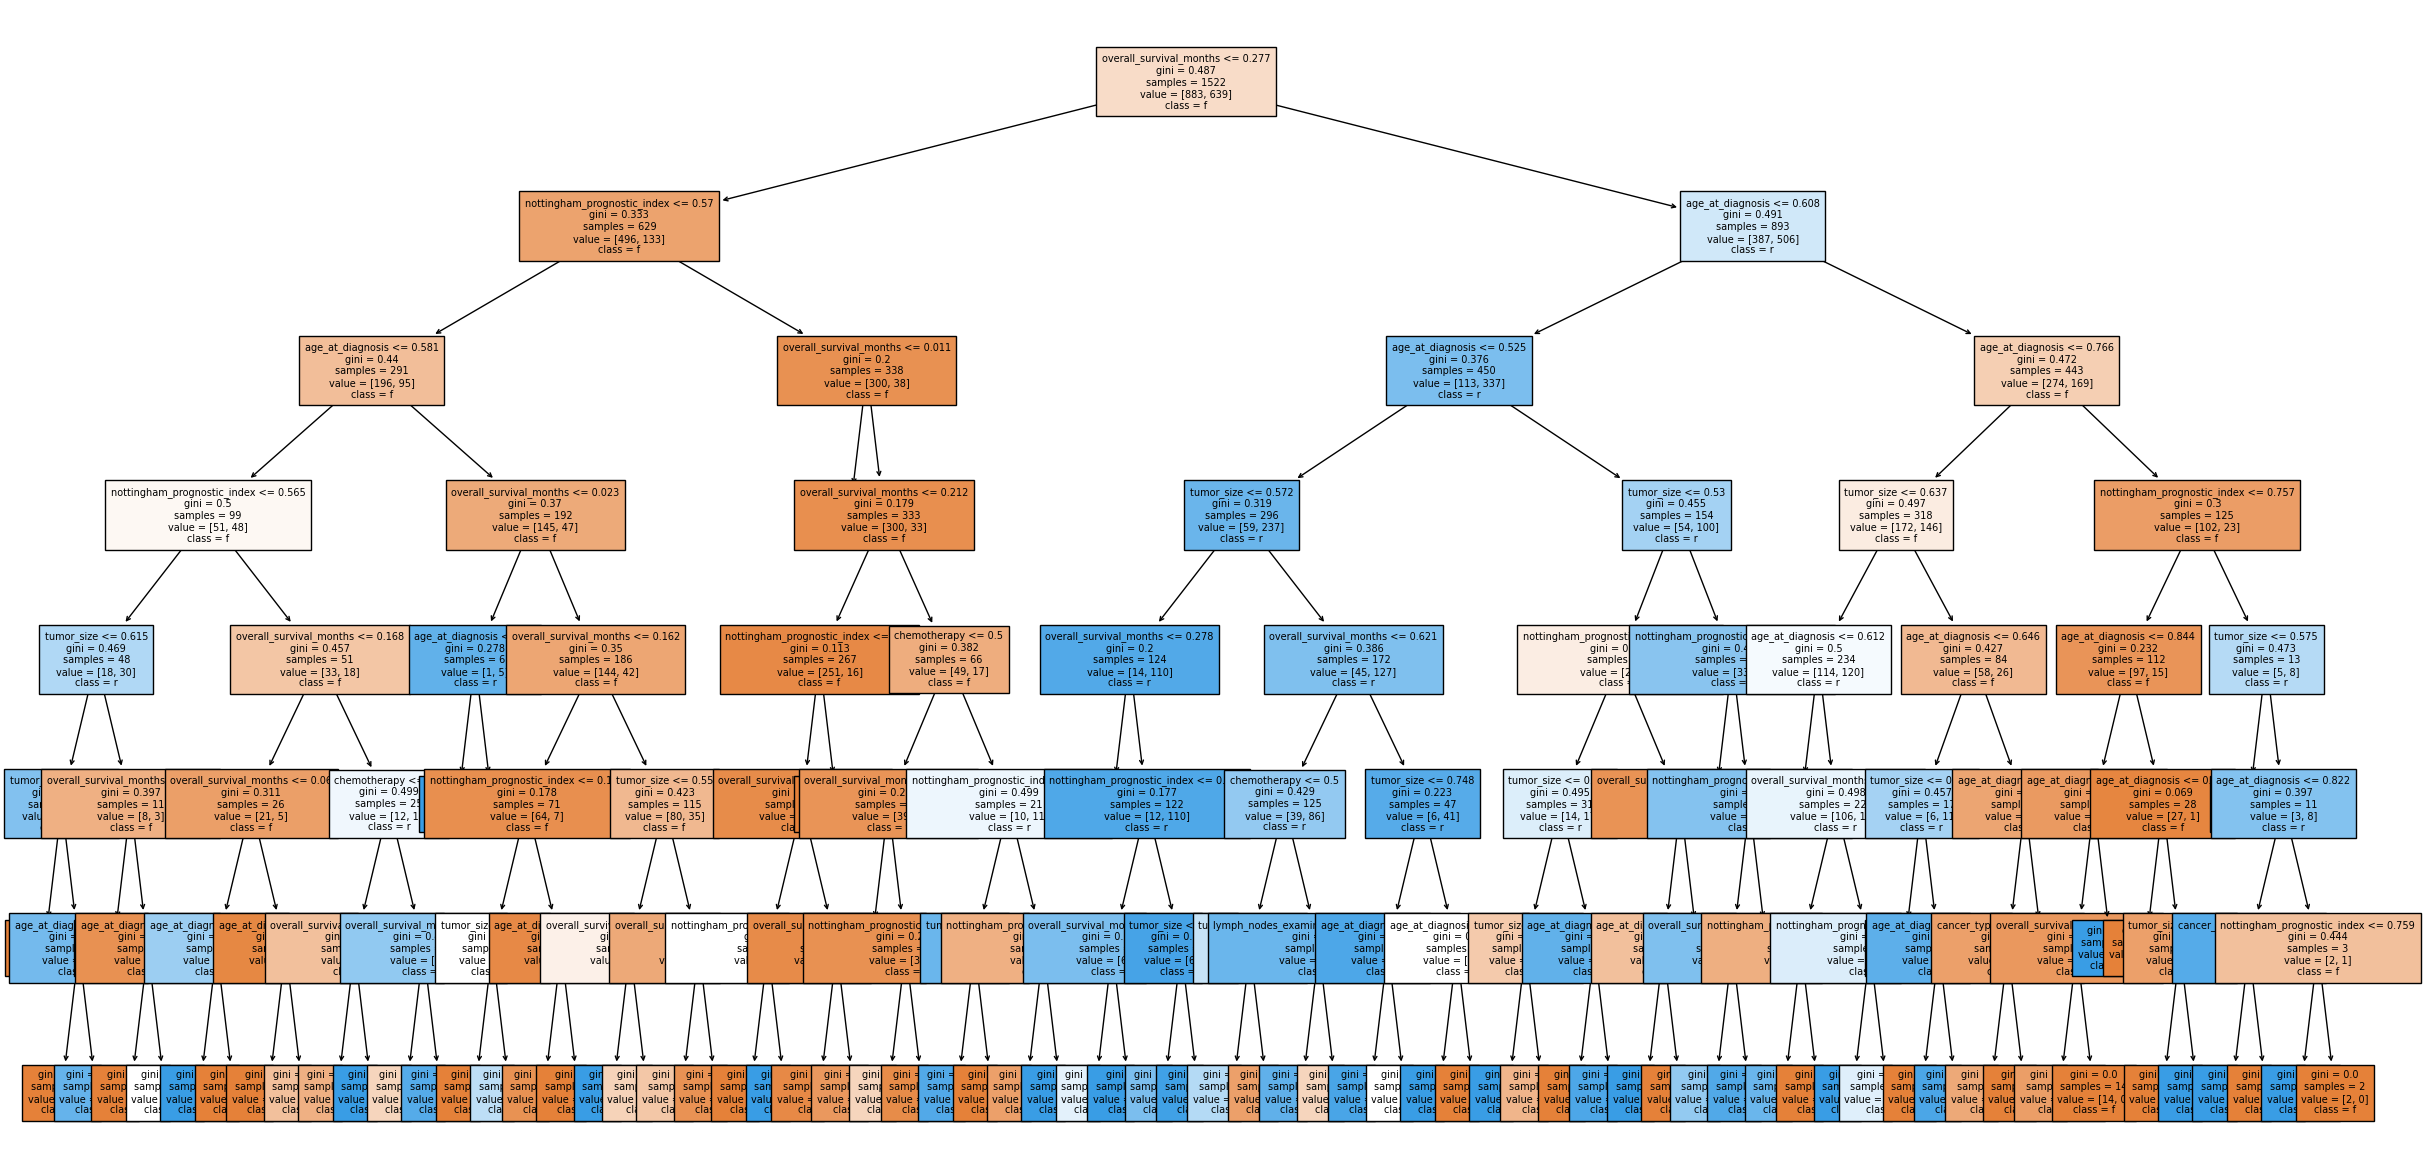

In [55]:
fig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {Modelo1.get_depth()}")
print(f"Número de nodos terminales: {Modelo1.get_n_leaves()}")
plot = plot_tree(decision_tree = Modelo1,
              feature_names = x_train.columns,
                filled = True,
               fontsize = 7,
                class_names = "fraud",
                ax = ax
              )

In [56]:
predicciones_train = Modelo1.predict(X = x_train)
predicciones_train

array([1., 1., 0., ..., 0., 0., 0.])

In [57]:
# train
metrics.accuracy_score(y_train,predicciones_train)

0.8140604467805519

In [58]:
predicciones_test = Modelo1.predict(X = x_test)
Probabilidad_test_M1 = Modelo1.predict_proba(X = x_test)

In [59]:
# train
metrics.accuracy_score(y_train, predicciones_train)

0.8140604467805519

In [60]:
# test
Accuracy_AD_VS_DD = metrics.accuracy_score(y_test, predicciones_test)
Accuracy_AD_VS_DD

0.7086614173228346

In [61]:
Reporte_AD_VS_DD=metrics.classification_report(y_test,predicciones_test)
print(Reporte_AD_VS_DD)

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.73       220
         1.0       0.64      0.73      0.68       161

    accuracy                           0.71       381
   macro avg       0.71      0.71      0.71       381
weighted avg       0.72      0.71      0.71       381



In [64]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion1 = pd.DataFrame(cm, index=['vive', 'muere'],
                         columns=['vive','muere'])
confusion1

,vive,muere
vive,117,44
muere,67,153


<AxesSubplot:>

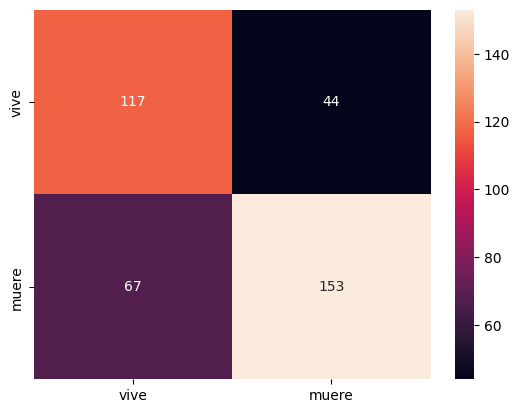

In [65]:
sns.heatmap(confusion1, annot=True,fmt="d")

<h1> Podando el árbol </h1>
<hr>

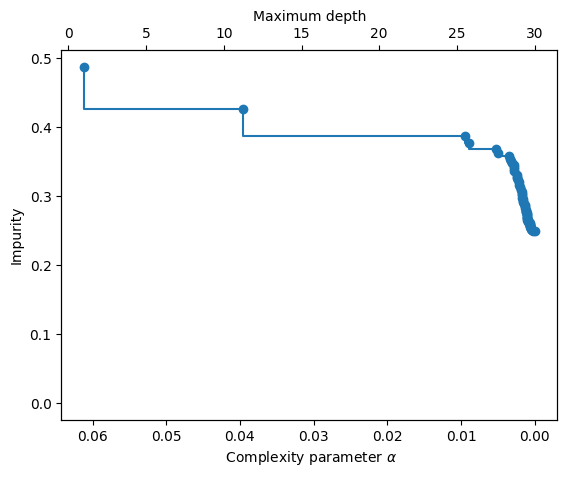

In [66]:
f=Modelo1
f.get_n_leaves() # number of leaves of the tree
f.get_depth()    # depth of the tree

f_alpha = f.cost_complexity_pruning_path(x_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(x_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(alphas, impurs, marker='o', drawstyle='steps-post')
ax.invert_xaxis()
plt.xlabel(r' Complexity parameter $\alpha$')
plt.ylabel('Impurity')
ax1 = ax.twiny()
#plt.plot(nodes, alphas, marker='o', drawstyle='steps-post', color='w')
#plt.xlabel('No. of terminal nodes')
plt.plot(depth, alphas, marker='o', drawstyle="steps-post", color='w')
plt.xlabel('Maximum depth')
plt.show()


results = {'alpha': alphas, 'Imputiry': impurs, 'Nodes': nodes, 'Depth': depth}
results = pd.DataFrame(results, columns = ['alpha', 'Imputiry', 'Nodes', 'Depth'])

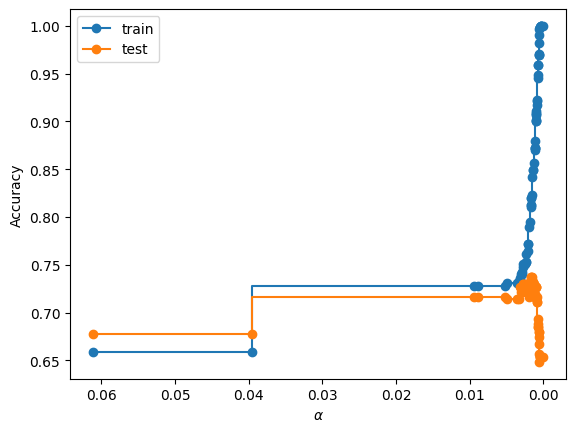

In [68]:
# Precision vs parámetro de complejidad

train_scores = [f.score(x_train, y_train) for f in fs]
test_scores  = [f.score(x_test, y_test)   for f in fs]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

<h2> Validación cruzada </h2>
<hr>

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

f = Modelo1
max_depth = range(1, 8, 1)
min_samples_leaf = range(1, 10, 1)
param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(f, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
grid_result = grid_search.fit(x_train, y_train)


print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.708277 using {'max_depth': 2, 'min_samples_leaf': 1}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 1}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 2}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 3}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 4}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 5}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 6}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 7}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 8}
0.653066 with: {'max_depth': 1, 'min_samples_leaf': 9}
0.708277 with: {'max_depth': 2, 'min_samples_leaf': 1}
0.708277 with: {'max_depth': 2, 'min_samples_leaf': 2}
0.708277 with: {'max_depth': 2, 'min_samples_leaf': 3}
0.708277 with: {'max_depth': 2, 'min_samples_leaf': 4}
0.708277 with: {'max_depth': 2, 'min_samples_leaf': 5}
0.708277 with: {'max_depth': 2, 'min_samples_leaf': 6}
0.708277 with: {'max_depth': 2, 'min_samples_leaf': 7}
0.708277 with: {'max_depth': 2, 'min_samples_leaf': 8}
0.70

In [70]:
f = DecisionTreeClassifier(
                           criterion='gini',    # 'gini' or 'entropy' impurity functions
                          max_depth=5,         # maximum depth of the tree
                          min_samples_leaf=3, 
                          ccp_alpha=0.000,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

print(f)
print('Depth:', f.get_depth())            # depth of the tree
print('No. of leaves:', f.get_n_leaves()) # number of leaves of the tree

# rules of the decision tree
feature_names = list(x_train.columns) # features' names to plot the tree
ft = export_text(f, feature_names=feature_names)
#print(ft)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=77)
Depth: 5
No. of leaves: 29


Profundidad del árbol: 5
Número de nodos terminales: 29


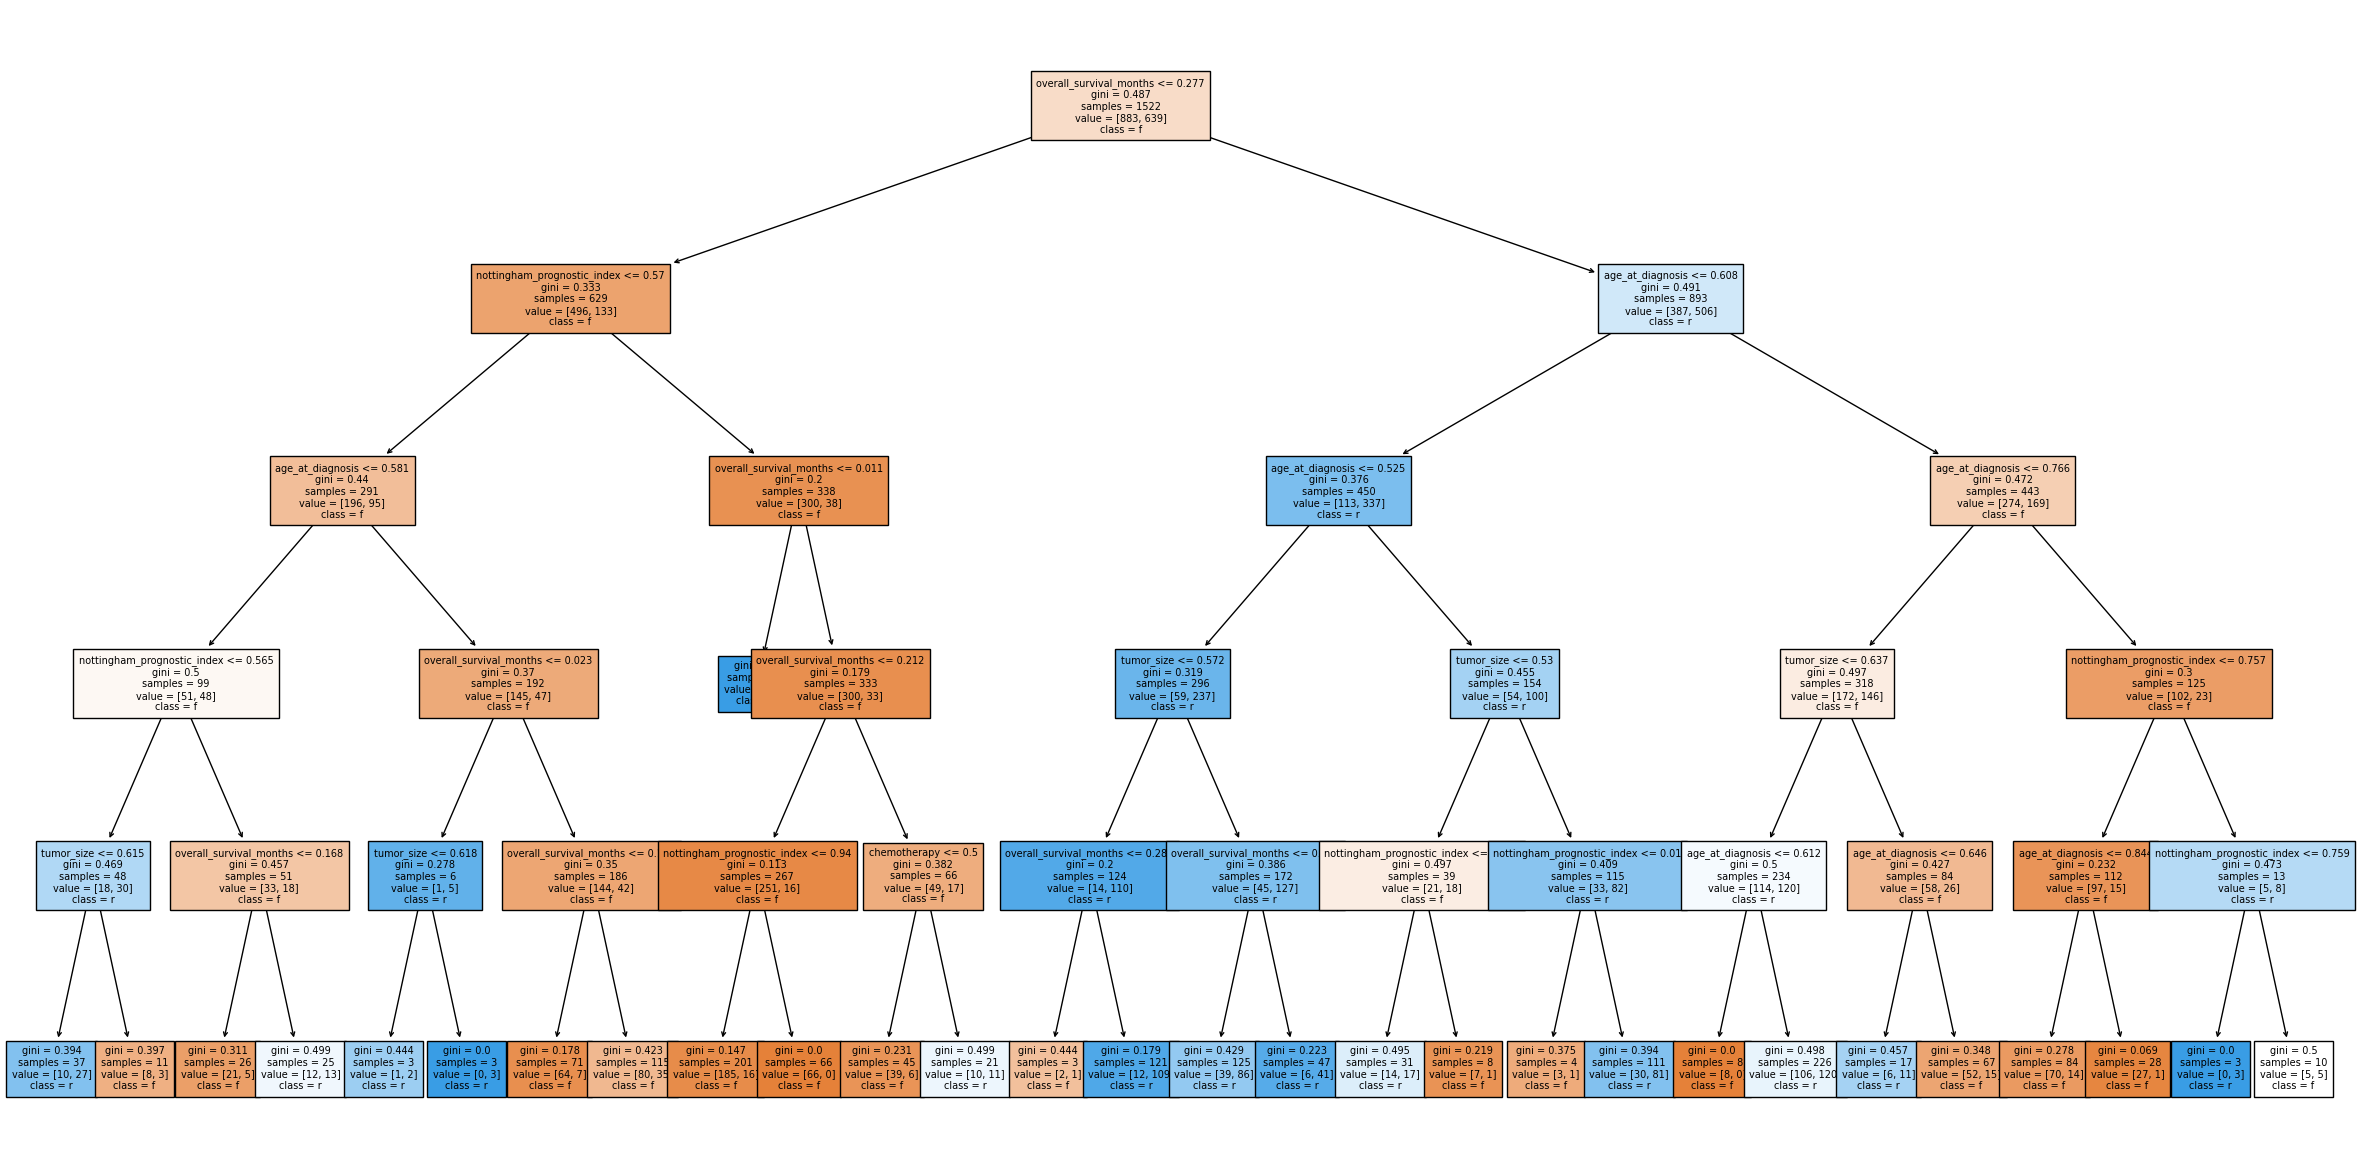

In [71]:
ig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {f.get_depth()}")
print(f"Número de nodos terminales: {f.get_n_leaves()}")
plot=plot_tree(decision_tree=f,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

In [72]:
predicciones_train=f.predict(X=x_train)
predicciones_train

array([1., 1., 0., ..., 0., 0., 0.])

In [73]:
predicciones_test=f.predict(X=x_test)
Probabilidad_test_M2=f.predict_proba(X=x_test)

In [74]:
Accuray_train_Optimo=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_Optimo=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_Optimo)
print(Accuray_test_Optimo)

0.7660972404730617
0.7322834645669292


In [75]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD1_0=fscore[0]
f1_Score_AD1_1=fscore[1]

In [76]:
Reporte_AD_Optimo=metrics.classification_report(y_test,predicciones_test)
print(Reporte_AD_Optimo)

              precision    recall  f1-score   support

         0.0       0.83      0.68      0.74       220
         1.0       0.65      0.81      0.72       161

    accuracy                           0.73       381
   macro avg       0.74      0.74      0.73       381
weighted avg       0.75      0.73      0.73       381



In [78]:
f_predict = f.predict(x_test)
cm = np.array(confusion_matrix(y_test, f_predict, labels=[1,0]))
confusion2 = pd.DataFrame(cm, index=['vive', 'muere'],
                         columns=['vive','muere'])
confusion2

,vive,muere
vive,130,31
muere,71,149


<AxesSubplot:>

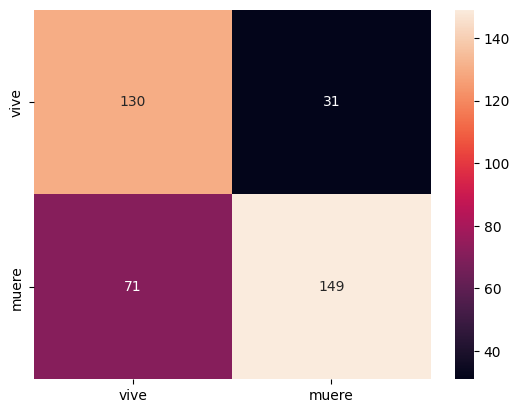

In [79]:
sns.heatmap(confusion1, annot=True,fmt="d")

<h1> Máquinas de soporte vectorial </h1>
<hr>

In [59]:
###modelo maquna soporte vectorial
X= df1.drop("overall_survival", axis=1).values


y = df1["overall_survival"].values
y

array([1., 1., 0., ..., 0., 0., 0.])

In [18]:
svc_model = SVC()

In [19]:
svc_model.fit(X_train, y_train)
svc_model

SVC()

In [20]:
#Usemos nuestro modelo entrenado para hacer una predicción usando nuestros datos de prueba
y_predict = svc_model.predict(X_test)

In [21]:
#Vamos a crear una matriz de confusión para el rendimiento de nuestro clasificador en el conjunto de datos de prueba.
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion1 = pd.DataFrame(cm, index=['vive', 'muere'],
                         columns=['vive','muere'])
confusion1

,vive,muere
vive,104,57
muere,36,184


<AxesSubplot:>

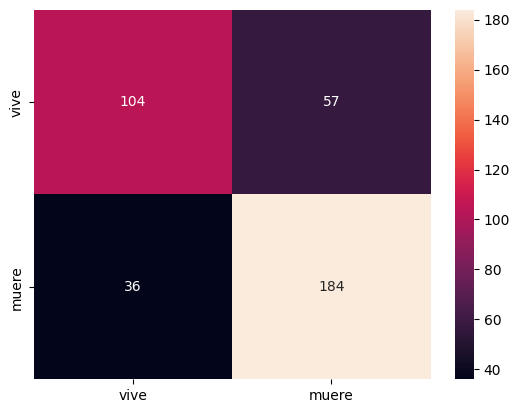

In [22]:
sns.heatmap(confusion1, annot=True,fmt="d")

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       220
         1.0       0.74      0.65      0.69       161

    accuracy                           0.76       381
   macro avg       0.75      0.74      0.74       381
weighted avg       0.75      0.76      0.75       381



In [24]:
X_train_min = X_train.min()
X_train_min

X_train_max = X_train.max()
X_train_max


X_train_range = (X_train_max- X_train_min)
X_train_range

X_train_scaled = (X_train - X_train_min)/(X_train_range)



In [25]:
#normalizando datos de entrenamiento
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [26]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
#SVM con datos normalizados
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['muere', 'vive'],
                         columns=['muere','vive'])
confusion


,muere,vive
muere,104,57
vive,36,184


In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       220
         1.0       0.74      0.65      0.69       161

    accuracy                           0.76       381
   macro avg       0.75      0.74      0.74       381
weighted avg       0.75      0.76      0.75       381



<AxesSubplot:>

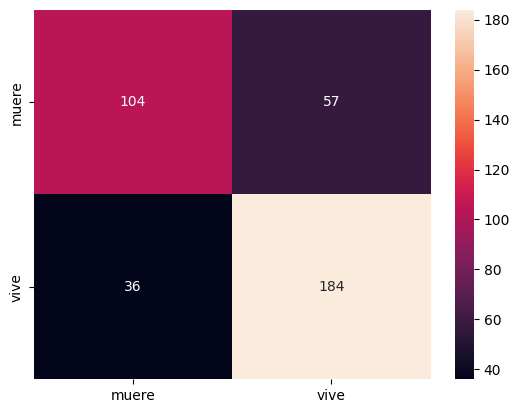

In [28]:
sns.heatmap(confusion,annot=True,fmt="d")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.584 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.582 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.582 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.580 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.685 total time=   0.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.747 total time=   0.3s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.668 total time=   0.4s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.714 total time=   0.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.715 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.711 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.698 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.717 total time=   0.0s
[CV 4/5] END ....C=1000, gam

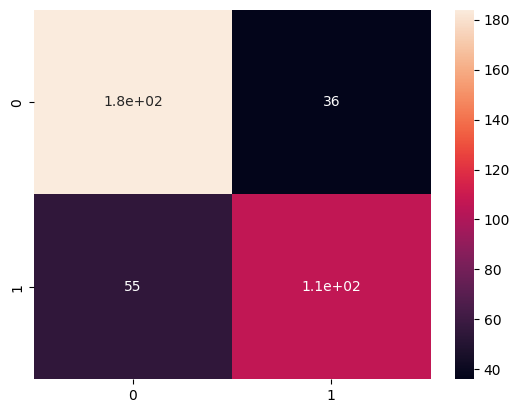

In [29]:
#hiperparametros
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [30]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [31]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [32]:
grid_predictions = grid.predict(X_test_scaled)
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
matriz0 = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
matriz0

,predicted_cancer,predicted_healthy
is_cancer,106,55
is_healthy,36,184


<AxesSubplot:>

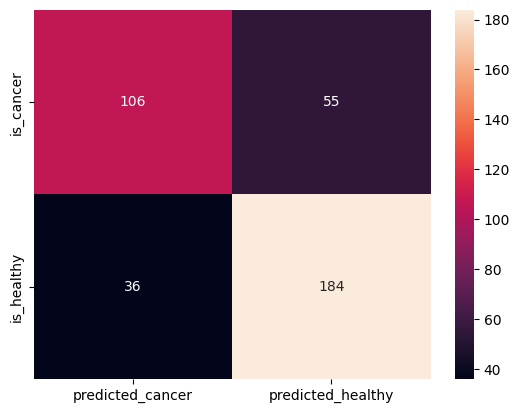

In [33]:
sns.heatmap(matriz0, annot=True, fmt="d")

In [34]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       220
         1.0       0.75      0.66      0.70       161

    accuracy                           0.76       381
   macro avg       0.76      0.75      0.75       381
weighted avg       0.76      0.76      0.76       381



In [35]:
#Regresion lineal
# paciente 1  diagnosis= 0
paciente_1 = df1.iloc[21, 2:8].values
# Visualizar las variables del paciente 1
print("datos paciente 1 : \n", paciente_1)
X = df1.iloc[:, 2:8].values
Y = df1.iloc[:, 1].values
# Importar libreria para la separaci´on de los datos de entrenamiento
from sklearn.model_selection import train_test_split
# Utilizar 25% de los Datos para Entrenar los Modelos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25,
random_state = 0)
#Importar librer´ıa para usar el Modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
#Usar el modelo Logistic Regression
logisticRegression = LogisticRegression(random_state = 0)
#Entrenar el modelo Logistic Regression
logisticRegression.fit(X_train, Y_train)
#Imprimir la respuesta del Modelo Logistic Regression
print("Logistic Regression TrainingAccuracy:",
logisticRegression.score(X_train,Y_train))

datos paciente 1 : 
 [0.30668168 0.55541277 0.70792198 0.37985075 0.         0.16666667]
Logistic Regression TrainingAccuracy: 0.8710581639803784


In [36]:
pred_1 = logisticRegression.predict([paciente_1])
pred_proba_1 = logisticRegression.predict_proba([paciente_1])
print("Diagnosis: ", pred_1)
print("Probabilidad de  morir: ", pred_proba_1[0][0])
print("Probabilidad de  vivir: ", pred_proba_1[0][1])

Diagnosis:  [0.]
Probabilidad de  morir:  0.9717838356386357
Probabilidad de  vivir:  0.02821616436136427


In [37]:
#Regresion lineal
# paciente 1  diagnosis= 0
paciente_1 = df1.iloc[21, 2:8].values
# Visualizar las variables del paciente 1
print("datos paciente 1 : \n", paciente_1)
X= df1.drop("overall_survival", axis=1).values
Y = df1["overall_survival"].values

# Importar libreria para la separaci´on de los datos de entrenamiento
from sklearn.model_selection import train_test_split
# Utilizar 25% de los Datos para Entrenar los Modelos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25,
random_state = 0)
#Importar librer´ıa para usar el Modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
#Usar el modelo Logistic Regression
logisticRegression = LogisticRegression(random_state = 0)
#Entrenar el modelo Logistic Regression
logisticRegression.fit(X_train, Y_train)
#Imprimir la respuesta del Modelo Logistic Regression
print("Logistic Regression TrainingAccuracy:",
logisticRegression.score(X_train,Y_train))

datos paciente 1 : 
 [0.30668168 0.55541277 0.70792198 0.37985075 0.         0.16666667]
Logistic Regression TrainingAccuracy: 0.7147862648913805


In [38]:


X1= df1.drop("overall_survival", axis=1).values
Y1 = df1["overall_survival"].values
X1.shape



validation_size = 0.20
seed = 7
X1_train, X1_validation, Y1_train, Y1_validation = train_test_split(X1, Y1, test_size=validation_size, random_state=seed)
model = linear_model.LogisticRegression()
model.fit(X1_train, Y1_train)

#Usemos nuestro modelo entrenado para hacer una predicción usando nuestros datos de prueba
Y1_predict = model.predict( X1_validation)

#Vamos a crear una matriz de confusión para el rendimiento de nuestro clasificador en el conjunto de datos de prueba.
cm = np.array(confusion_matrix(Y1_validation, Y1_predict, labels=[1,0]))
matriz = pd.DataFrame(cm, index=['muere', 'vive'],
                         columns=['predicted_muere','predicted_vive'])
matriz


,predicted_muere,predicted_vive
muere,93,67
vive,46,175


              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76       221
         1.0       0.67      0.58      0.62       160

    accuracy                           0.70       381
   macro avg       0.70      0.69      0.69       381
weighted avg       0.70      0.70      0.70       381



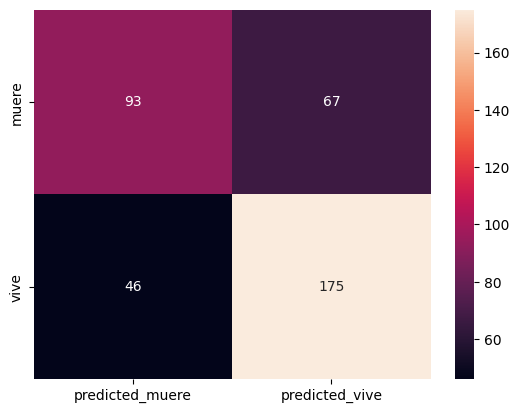

In [39]:
sns.heatmap(matriz, annot=True, fmt="d")
print(classification_report(Y1_validation, Y1_predict))

<AxesSubplot:>

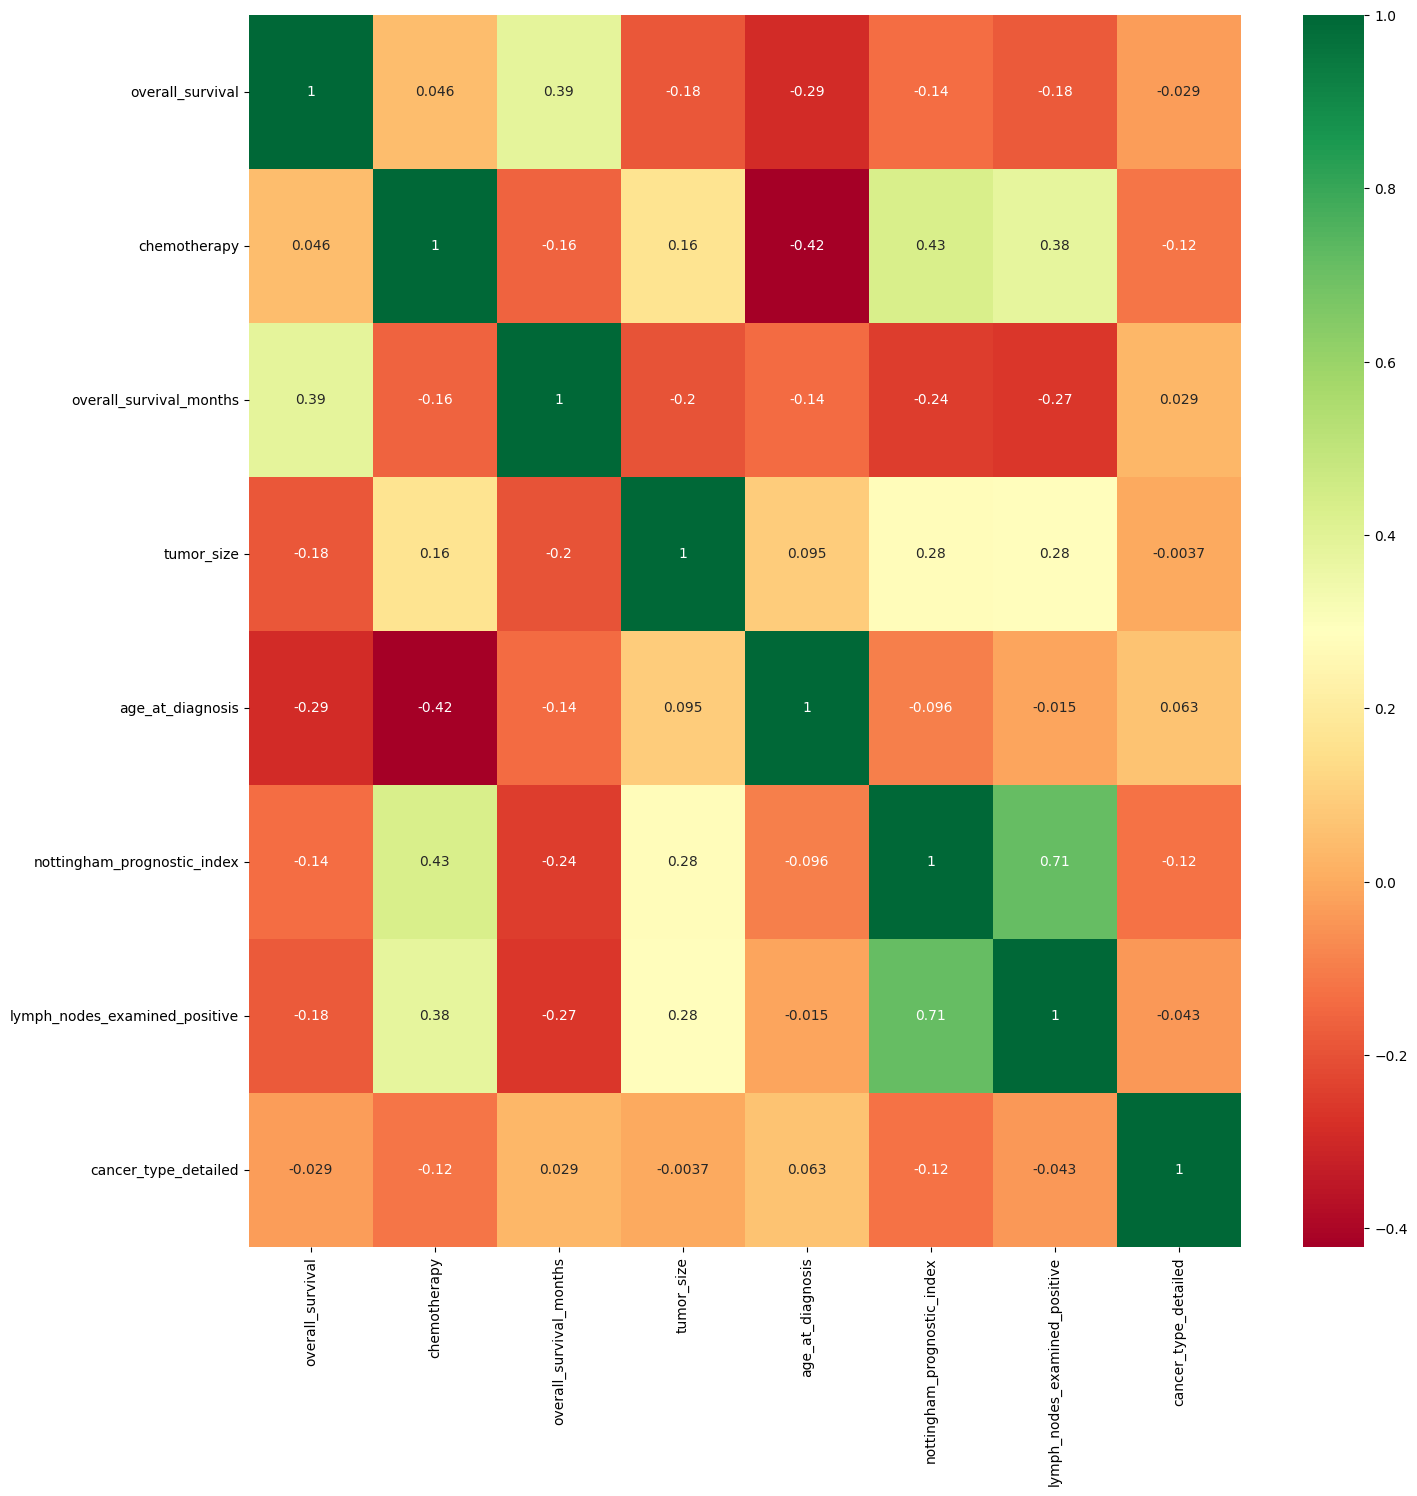

In [40]:
#comparando independencia entre variables
plt.figure(figsize = (16,16))
sns.heatmap(analisis1.corr(), annot = True, cmap = "RdYlGn")

<h1> Pruebas de normalidad </h1>
<hr>
<h2> D'Agostino </h2>

<p> A continuación, se realiza una prueba (llamada prueba D'Agostino), para determinar si los datos siguen o no una distribución normal, ya que la prueba de Shapiro es poco precisa para la cantidad de datos que tenemos en esta base de datos. </p>

<p> Así, la prueba de hipótesis que plantea D'Agostino es la siguiente:</p>

<p> $H_0:$ Los datos proceden de una distribución normal.</p>

<p> $H_1:$ Los datos no proceden de una distribución normal.</p>

<p> Si se rechaza $H_0$, se concluye que hay evidencia estadística suficiente para afirmar que los datos no siguen una distribución normal. Por lo tanto, las siguientes celdas se centrarán en realizar esta prueba y, en caso de no seguir una distribución normal, hacer una estandarización de los datos. </p>

In [41]:
for i in analisis1:
    k2, p_value = stats.normaltest(analisis1[i])
    print(f"{i} = {k2}, p_valor = {p_value}")

overall_survival = 7332.254123491217, p_valor = 0.0
chemotherapy = 379.8196575539383, p_valor = 3.335871423163791e-83
overall_survival_months = 189.96667467687158, p_valor = 5.613848925780835e-42
tumor_size = nan, p_valor = nan
age_at_diagnosis = 65.70558661788681, p_valor = 5.3977547818331965e-15
nottingham_prognostic_index = 14.08499100849108, p_valor = 0.0008739429104918542
lymph_nodes_examined_positive = 449.2006355676193, p_valor = 2.8662980800755445e-98
cancer_type_detailed = nan, p_valor = nan


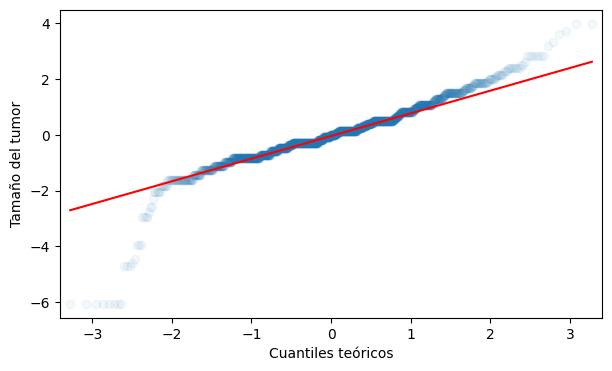

In [42]:
# Gráfico QQ
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(df1["tumor_size"], fit = True,  line = "q", alpha = 0.05, lw = 2, ax = ax)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Tamaño del tumor")
plt.show()

<h2> Chi cuadrado </h2>
<hr>

In [43]:
# Chi cuadrado
from scipy.stats import chi2_contingency
  
# definiendo la tabla
data = [df1["overall_survival"], df1["tumor_size"]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpreta el p_valor
alpha = 0.05
print("El p-valor es: " + str(p))
if p <= alpha:
    print('Dependiente (rechaza H0)')
else:
    print('Independiente (H0 se mantiene verdadera)')


ValueError: The internally computed table of expected frequencies has a zero element at (0, 938).

<h2> Estandarización de los datos </h2>

In [ ]:
from sklearn.preprocessing import StandardScaler
datos_estandarizados = StandardScaler().fit_transform(analisis1)
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns = analisis1.columns)
datos_estandarizados.describe()

<h1> Modelo de regresión multilineal </h1>
<hr>

In [ ]:
# Modelo de regresión lineal
def modelo(base_datos):
    xi = [var_dep + "~"]
    for i in base_datos:
        xi[0] = xi[0] + "+" + i
    return xi[0]

MRL = smf.ols(modelo(analisis2), datos_estandarizados).fit()
MRL.summary()

In [ ]:
# Eliminando columnas cuyo P-valor supera 0.05
def limpiador_pvalor(base_datos, regresion):
    for i in base_datos:
        if regresion.pvalues[i] > 0.05:
            base_datos = base_datos.drop([i], axis = 1)
    return base_datos

y = datos_estandarizados.loc[:, var_dep]
analisis2 = datos_estandarizados.drop(var_dep, axis = 1)
analisis2 = limpiador_pvalor(analisis2, MRL)
datos_estandarizados = pd.concat([y, analisis2], axis = 1)
datos_estandarizados

In [ ]:
# Regresión con las variables contribuyentes al modelo
MRL_2 = smf.ols(modelo(analisis2), datos_estandarizados).fit()
MRL_2.summary()

<h1> Prueba ANOVA </h1>
<hr>

In [ ]:
# ANOVA
tabla_anova = sm.stats.anova_lm(MRL_2, typ = 3)
tabla_anova

In [ ]:
# variables utilizadas en el modelo de regresion 

import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for idx, feature in enumerate(list(df1.columns)[:4]):

    sns.boxplot( x='overall_survival', y=feature, data=df1, ax=axes[idx])
plt.show()